<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/module5/comvolutional1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip
!unzip -q /content/test_partial.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [4]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation. 


training_dir = '/content/training/'
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42)



Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


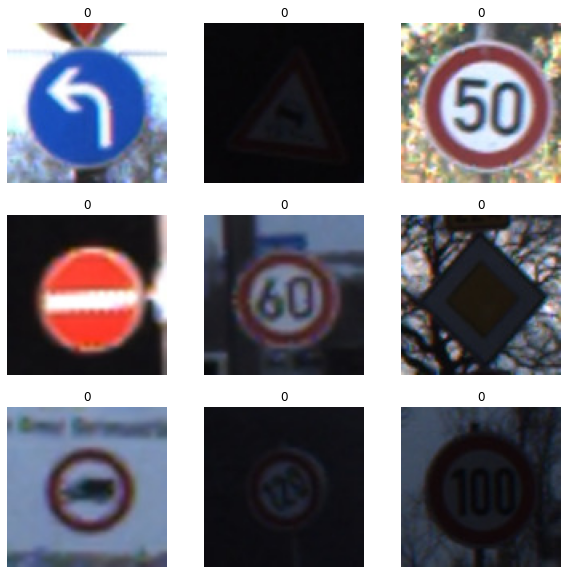

In [16]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [8]:
# Build a model...
# custom made model
cnn = tf.keras.Sequential([
         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
         layers.MaxPooling2D((2,2)),
         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
         layers.MaxPooling2D((3,3)),
         #dense
         
         layers.Flatten(),
         layers.Dense(units=64, activation='relu'),
         layers.Dense(units=43)                         
])

cnn.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics= ['accuracy']
            )


In [9]:

cnn.fit(train_generator,
       steps_per_epoch=980,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=80
       )

Epoch 1/5
980/980 [==============================] - 37s 25ms/step - loss: 1.1570 - accuracy: 0.6816 - val_loss: 0.7479 - val_accuracy: 0.8027
Epoch 2/5
980/980 [==============================] - 25s 25ms/step - loss: 0.2196 - accuracy: 0.9397 - val_loss: 0.6478 - val_accuracy: 0.8270
Epoch 3/5
980/980 [==============================] - 25s 25ms/step - loss: 0.1245 - accuracy: 0.9662 - val_loss: 0.6507 - val_accuracy: 0.8449
Epoch 4/5
980/980 [==============================] - 24s 25ms/step - loss: 0.0852 - accuracy: 0.9768 - val_loss: 0.6047 - val_accuracy: 0.8699
Epoch 5/5
980/980 [==============================] - 26s 26ms/step - loss: 0.0685 - accuracy: 0.9811 - val_loss: 0.5843 - val_accuracy: 0.8762


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale= 1./255)
test_generator= test_datagen.flow_from_directory(
    test_dir,
    classes=['test_partial'],
    target_size=image_size,
    class_mode ='sparse',
    shuffle=False)
probabilities = cnn.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]


Found 201 images belonging to 1 classes.


In [ ]:
predictions

In [46]:
test_labels =validation_generator.classes

In [33]:
test_labels.shape

(7841,)

In [47]:
new_probabilities = cnn.predict(validation_generator)
test_labels = validation_generator.classes
new_predictions = [np.argmax(probas) for probas in new_probabilities]

In [48]:
print (classification_report(test_labels, new_predictions))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02        42
           1       0.05      0.05      0.05       444
           2       0.06      0.06      0.06       450
           3       0.04      0.04      0.04       282
           4       0.06      0.07      0.06       396
           5       0.05      0.06      0.06       372
           6       0.00      0.00      0.00        84
           7       0.03      0.02      0.02       288
           8       0.03      0.03      0.03       282
           9       0.05      0.06      0.05       294
          10       0.06      0.06      0.06       402
          11       0.03      0.03      0.03       264
          12       0.06      0.06      0.06       420
          13       0.06      0.06      0.06       432
          14       0.02      0.02      0.02       156
          15       0.03      0.02      0.03       126
          16       0.01      0.01      0.01        84
          17       0.02    